In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\HP\AppData\Local\Temp\ipykernel_18324\2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [24]:
df =pd.read_csv('linear_data.csv')
df.head()
                

,x,y
0,0.00000,4.447692
1,0.02004,5.024612
2,0.04008,5.869593
3,0.06012,4.722490
4,0.08016,4.877101


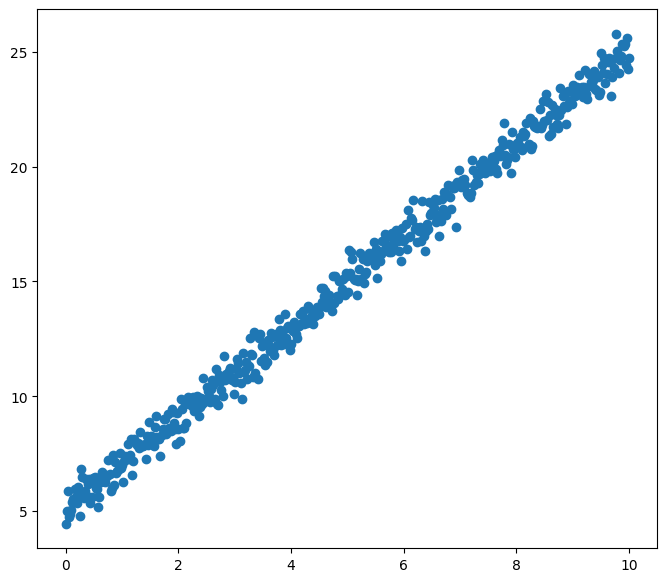

In [25]:
plt.figure(figsize=(8,7))
plt.scatter(df[['x']],df['y'])

In [26]:
df.corr()

,x,y
x,1.00000,0.99644
y,0.99644,1.00000


In [27]:
df2=pd.read_csv('nonlinear_data.csv')
df2.head()

,x,y
0,0.00000,-0.155043
1,0.02004,0.081809
2,0.04008,-0.014298
3,0.06012,0.143978
4,0.08016,0.019553


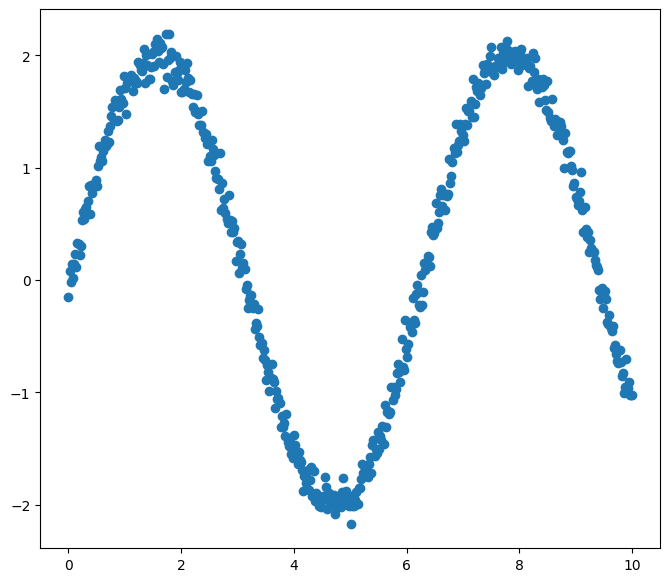

In [28]:
plt.figure(figsize=(8,7))
plt.scatter(df2[['x']],df2['y'])
            

In [29]:
df2.corr()

,x,y
x,1.000000,-0.065736
y,-0.065736,1.000000


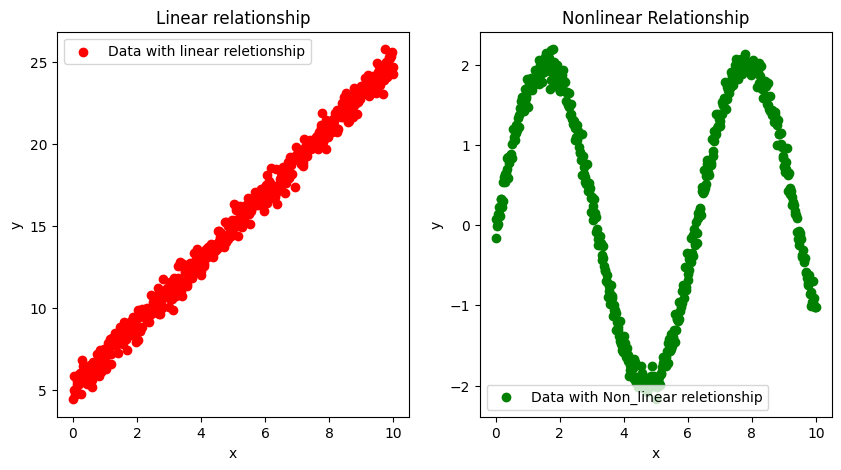

In [30]:
#linear
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)

plt.scatter(df.x, df.y, color='red',label='Data with linear reletionship')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear relationship')
plt.legend()

#nonlinear
plt.subplot(1,2,2)
plt.scatter(df2.x, df2.y, color='green', label='Data with Non_linear reletionship')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Nonlinear Relationship')
plt.legend()
            

In [31]:
df.corr()

,x,y
x,1.00000,0.99644
y,0.99644,1.00000


In [32]:
df2.corr()

,x,y
x,1.000000,-0.065736
y,-0.065736,1.000000


Linear

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
df.head()

,x,y
0,0.00000,4.447692
1,0.02004,5.024612
2,0.04008,5.869593
3,0.06012,4.722490
4,0.08016,4.877101


In [35]:
reg1=LinearRegression()

In [36]:
reg1.fit(df[['x']],df[['y']])

LinearRegression()

In [37]:
reg1.score(df[['x']],df[['y']])#traning data

0.9928923730526016

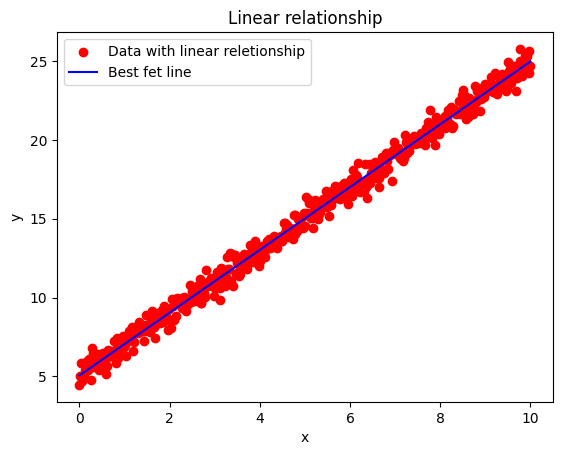

In [38]:
plt.scatter(df.x, df.y, color='red',label='Data with linear reletionship')
plt.plot(df[['x']],reg1.predict(df[['x']]),color='blue',label='Best fet line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear relationship')
plt.legend()

NON linear

In [39]:
df2.head()

,x,y
0,0.00000,-0.155043
1,0.02004,0.081809
2,0.04008,-0.014298
3,0.06012,0.143978
4,0.08016,0.019553


In [40]:
reg2=LinearRegression()

In [41]:
reg2.fit(df2[['x']], df2[['y']])

LinearRegression()

In [42]:
reg2.score(df2[['x']], df2[['y']])

0.004321199719043656

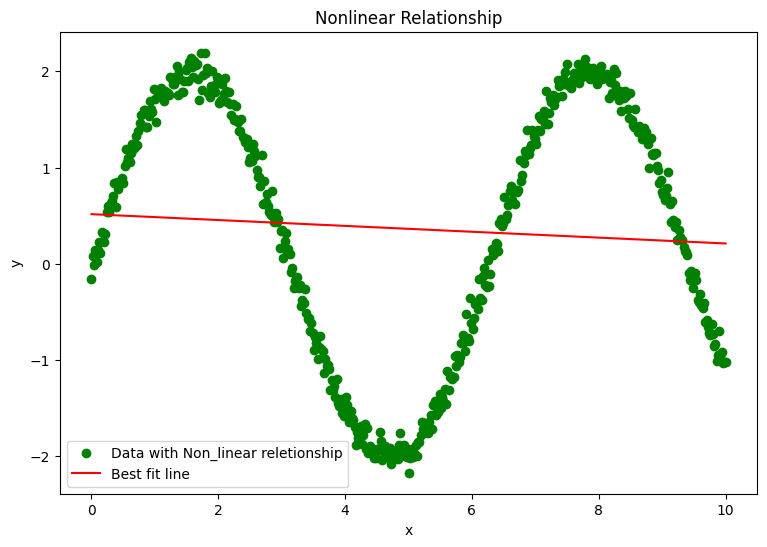

In [43]:
plt.figure(figsize=(9,6))

plt.scatter(df2.x, df2.y, color='green', label='Data with Non_linear reletionship')
plt.plot(df2[['x']],reg2.predict(df2[['x']]),color='red', label='Best fit line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Nonlinear Relationship')
plt.legend()

Linear regression cannot be run on this data 
here we have to run polynomial regression 

Polynomial regression

In [44]:
from sklearn.preprocessing import PolynomialFeatures

In [45]:
poly=PolynomialFeatures(degree=4)
x_poly=poly.fit_transform(df2[['x']])

In [46]:
x_poly.shape  #(n+d)! /n!d!

(500, 5)

In [47]:
pd.DataFrame(x_poly)

,0,1,2,3,4
0,1.0,0.00000,0.000000,0.000000,0.000000e+00
1,1.0,0.02004,0.000402,0.000008,1.612864e-07
2,1.0,0.04008,0.001606,0.000064,2.580583e-06
3,1.0,0.06012,0.003614,0.000217,1.306420e-05
4,1.0,0.08016,0.006426,0.000515,4.128932e-05
...,...,...,...,...,...
495,1.0,9.91984,98.403219,976.144159,9.683194e+03
496,1.0,9.93988,98.801210,982.072144,9.761679e+03
497,1.0,9.95992,99.200003,988.024080,9.840641e+03
498,1.0,9.97996,99.599600,994.000016,9.920080e+03


In [48]:
reg_poly= LinearRegression()

In [49]:
reg_poly.fit(x_poly,df2.y)

LinearRegression()

In [50]:
reg_poly.score(x_poly,df2.y)

0.9067596910369458

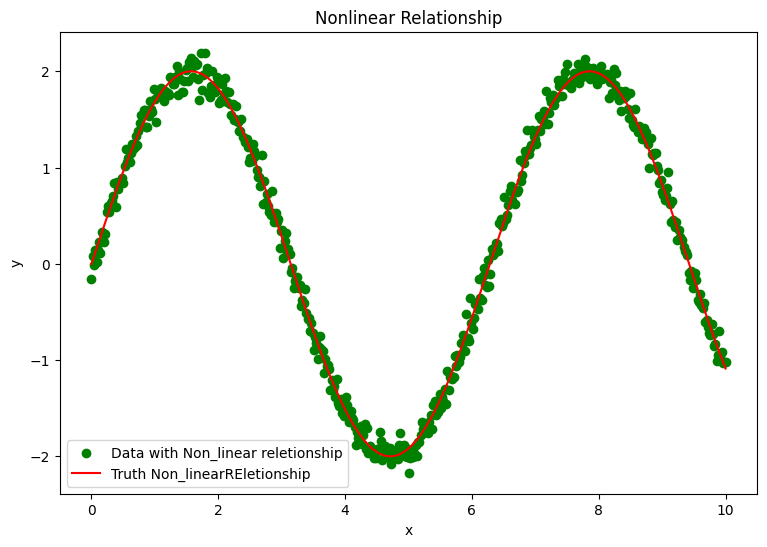

In [51]:
plt.figure(figsize=(9,6))

plt.scatter(df2.x, df2.y, color='green', label='Data with Non_linear reletionship')
plt.plot(df2.x, 2* np.sin(df2.x), color='red',label='Truth Non_linearREletionship')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Nonlinear Relationship')
plt.legend()

Testing Overfit or bestfit

In [52]:
from sklearn.model_selection import train_test_split

In [62]:
xtrain, xtest, ytrain, ytest=train_test_split(x_poly,df2.y,test_size=0.25,random_state=42)

In [63]:
x_poly.shape

(500, 5)

In [64]:
xtrain.shape

(375, 5)

In [65]:
pd.DataFrame(xtrain)

,0,1,2,3,4
0,1.0,4.549098,20.694294,94.140377,428.253821
1,1.0,8.356713,69.834659,583.588235,4876.879639
2,1.0,4.068136,16.549733,67.326568,273.893654
3,1.0,2.525050,6.375878,16.099411,40.651820
4,1.0,6.593186,43.470107,286.606514,1889.650163
...,...,...,...,...,...
370,1.0,2.124248,4.512432,9.585526,20.362040
371,1.0,5.410822,29.276991,158.412576,857.142194
372,1.0,6.973948,48.635949,339.184576,2365.455560
373,1.0,8.717435,75.993671,662.469875,5775.037988


In [66]:
reg_poly.fit(xtrain, ytrain)

LinearRegression()

In [67]:
reg_poly.score(xtrain, ytrain)

0.9116982201344858

In [68]:
reg_poly.score(xtest,ytest)

0.8853570436936017